# Espresso Customer Churn Prediction

Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.


#### Column description:
1. Region - location of each client
2. Tenure - duration in the network
3. Montant - top up amount
4. Frequence_rech - number of times the customer refilled
5. Revenue - monthly income for each client
6. ARPU_Segment - income over 90 days / 3
7. Frequence - number of times the client has made an income
8. Data_volume - number of connections
9. On_net - inter expresso call
10. Orange - call to orange
11. Tigo - call to Tigo
12. Zone1 - call to zones1
13. Zone2 - call to zones2
14. MRG - a client who is going
15. Regularity - number of times the client is active for 90 days
16. Top_pack - the most active packs
17. Freq_top_pack - number of times the client has activated the top pack packages
18. Churn - variable to predict - Target



### Load Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
#from skelarn.ensemble import RandomForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


%matplotlib inline
sns.set()

### Load and Explore the data

In [2]:
espresso_df = pd.read_csv('datasets/Expresso_churn_dataset.csv')
espresso_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


#### Rename columns for easier reference

In [21]:
df = espresso_df.copy()
df.rename(inplace=True, columns={
    "TENURE": "network_duration",
    "MONTANT": "topup_amount",
    "FREQUENCE_RECH": "num_refill_amount",
    "REVENUE": "monthly_income",
    "ARPU_SEGMENT": "income_over_90days_3",
    "FREQUENCE": "num_times_income_generated",
    "DATA_VOLUME": "num_of_connections",
    "ON_NET": "inter_espresso_call",
    "ORANGE": "orange_calls",
    "TIGO": "tigo_calls",
    "ZONE1": "zone1_calls",
    "ZONE2": "zone2_calls",
    "MRG": "visiting_client",
    "TOP_PACK": "active_pack",
    "FREQ_TOP_PACK":"frequency_activating_top_pack"
})

In [22]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [23]:
df.head()

,user_id,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [24]:
df.shape

(2154048, 19)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   user_id                        object 
 1   region                         object 
 2   network_duration               object 
 3   topup_amount                   float64
 4   num_refill_amount              float64
 5   monthly_income                 float64
 6   income_over_90days_3           float64
 7   num_times_income_generated     float64
 8   num_of_connections             float64
 9   inter_espresso_call            float64
 10  orange_calls                   float64
 11  tigo_calls                     float64
 12  zone1_calls                    float64
 13  zone2_calls                    float64
 14  visiting_client                object 
 15  regularity                     int64  
 16  active_pack                    object 
 17  frequency_activating_top_pack  float64
 18  ch

In [26]:
df.describe(include='all')

,user_id,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
count,2154048,1304749,2154048,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2154048,2.154048e+06,1251454,1.251454e+06,2.154048e+06
unique,2154048,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,140,NaN,NaN
top,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,513271,2043201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154048,NaN,317802,NaN,NaN
mean,NaN,NaN,NaN,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,NaN,2.804251e+01,NaN,9.272461e+00,1.875474e-01
std,NaN,NaN,NaN,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,NaN,2.228686e+01,NaN,1.228044e+01,3.903504e-01
min,NaN,NaN,NaN,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,NaN,6.000000e+00,NaN,2.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,NaN,2.400000e+01,NaN,5.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,NaN,5.100000e+01,NaN,1.200000e+01,0.000000e+00


In [27]:
df.isnull().sum()

user_id                                0
region                            849299
network_duration                       0
topup_amount                      756739
num_refill_amount                 756739
monthly_income                    726048
income_over_90days_3              726048
num_times_income_generated        726048
num_of_connections               1060433
inter_espresso_call               786675
orange_calls                      895248
tigo_calls                       1290016
zone1_calls                      1984327
zone2_calls                      2017224
visiting_client                        0
regularity                             0
active_pack                       902594
frequency_activating_top_pack     902594
churn                                  0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
profile = ProfileReport(df, title='Espresso Dataset Analysis Report')

In [30]:
#profile.to_file(output_file='profile-report.html')

#### Interpretation

* The espresso dataset has 2,154,048 million values with 19 columns
* There are 4 categorical columns (need to encoded if for our machine model) and 15 numerical columns
* There are columns with missing values and there isn't any values that are duplicated


### Data Cleaning

#### Handling Missing Data - Region

In [31]:
df.region.isnull().sum()

np.int64(849299)

In [32]:
df.region.nunique(), df.region.unique()

(14,
 array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
        'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
        'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object))

In [33]:
missing_regions = df[df.region.isnull()]
missing_regions

,user_id,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,NaN,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
17,0000a45ed15492427df603217166f1f813a2cc83,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
20,0000acdef1acb2577faad8954069f541961dbfd9,NaN,K > 24 month,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,12,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,ffffb2b8b63959b8a374e2a2ccaf2b9e521879ad,NaN,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,0.0,2.0,12.0,3.0,NaN,NaN,NO,12,All-net 500F=2000F;5d,2.0,0
2154041,ffffd1d48dd02c059c82c70b8793c8dfa3d09593,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1


In [34]:
df[df.region.notna()]

,user_id,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154039,ffffc38e1c3cb77a88941e739c358fd96bce3238,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,0.0,57.0,1.0,NaN,2.0,NaN,NO,21,All-net 500F=2000F;5d,2.0,0
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,7400.0,2.0,12.0,NaN,NaN,0.0,NO,62,"Data:1000F=2GB,30d",3.0,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0


In [41]:
region_mode = df.region.mode()
region_mode[0]

'DAKAR'

Since the region is categorical and from a high level, there doesn't seem to be a relation between the value of region and other columns eg topup amounts, we can fill the missing values with the mode. In our case this is DAKAR.

In [42]:
df.loc[missing_regions.index, 'region'] = region_mode[0]

In [43]:
df.region.isnull().sum()

np.int64(0)

#### Handling Missing Data - Topup amount

In [44]:
missing_topups = df[df.topup_amount.isnull()]
missing_topups

,user_id,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,DAKAR,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
13,000075053fc8393648ce32568fe4d761048b739f,THIES,K > 24 month,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,26,NaN,NaN,0
16,0000a0d034eb5893f9d50fc4c038fac22e5c8e80,KOLDA,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,37,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154039,ffffc38e1c3cb77a88941e739c358fd96bce3238,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154041,ffffd1d48dd02c059c82c70b8793c8dfa3d09593,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1


In [72]:
regions = missing_topups.region.unique()
regions.sort()
regions

array(['DAKAR', 'DIOURBEL', 'FATICK', 'KAFFRINE', 'KAOLACK', 'KEDOUGOU',
       'KOLDA', 'LOUGA', 'MATAM', 'SAINT-LOUIS', 'SEDHIOU', 'TAMBACOUNDA',
       'THIES', 'ZIGUINCHOR'], dtype=object)

Given different regions might have more topups basing on number of shops and other factors, let's fill in the missing top up amounts based on the averages per region

In [76]:
avg_topups_per_region = round(df.groupby(['region'])['topup_amount'].mean())
avg_topups_per_region

region
DAKAR          5761.0
DIOURBEL       3848.0
FATICK         4546.0
KAFFRINE       4841.0
KAOLACK        4907.0
KEDOUGOU       5971.0
KOLDA          5315.0
LOUGA          4771.0
MATAM          4923.0
SAINT-LOUIS    5964.0
SEDHIOU        4671.0
TAMBACOUNDA    5702.0
THIES          5860.0
ZIGUINCHOR     5417.0
Name: topup_amount, dtype: float64

In [80]:
for i,region in enumerate(regions):
    df.loc[missing_topups[missing_topups.region == region].index, 'topup_amount'] = avg_topups_per_region.iloc[i]

In [81]:
df.topup_amount.isnull().sum()

np.int64(0)

#### Handling Missing Data - Num Refill Amount

In [82]:
missing_num_refill_amount = df[df.num_refill_amount.isnull()]
missing_num_refill_amount

,user_id,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,5761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,4771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,DAKAR,G 12-15 month,5761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
13,000075053fc8393648ce32568fe4d761048b739f,THIES,K > 24 month,5860.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,26,NaN,NaN,0
16,0000a0d034eb5893f9d50fc4c038fac22e5c8e80,KOLDA,K > 24 month,5315.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,37,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154039,ffffc38e1c3cb77a88941e739c358fd96bce3238,DAKAR,K > 24 month,5761.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154041,ffffd1d48dd02c059c82c70b8793c8dfa3d09593,DAKAR,K > 24 month,5761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,DAKAR,K > 24 month,5761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,DAKAR,K > 24 month,5761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1


Given different regions might have more number of refill amounts basing on number of shops and other factors, let's fill in the missing top up amounts based on the averages per region

In [83]:
avg_num_refill_amount_per_region = round(df.groupby(['region'])['num_refill_amount'].mean())
avg_num_refill_amount_per_region

region
DAKAR          12.0
DIOURBEL        7.0
FATICK         10.0
KAFFRINE       10.0
KAOLACK        11.0
KEDOUGOU       10.0
KOLDA          12.0
LOUGA          10.0
MATAM          11.0
SAINT-LOUIS    14.0
SEDHIOU         8.0
TAMBACOUNDA    13.0
THIES          12.0
ZIGUINCHOR     10.0
Name: num_refill_amount, dtype: float64

In [88]:
for i,region in enumerate(regions):
    df.loc[missing_num_refill_amount[missing_num_refill_amount.region == region].index, 'num_refill_amount'] = avg_num_refill_amount_per_region.iloc[i]

In [89]:
df.num_refill_amount.isnull().sum()

np.int64(0)

In [86]:
df.isnull().sum()

user_id                                0
region                                 0
network_duration                       0
topup_amount                           0
num_refill_amount                      0
monthly_income                    726048
income_over_90days_3              726048
num_times_income_generated        726048
num_of_connections               1060433
inter_espresso_call               786675
orange_calls                      895248
tigo_calls                       1290016
zone1_calls                      1984327
zone2_calls                      2017224
visiting_client                        0
regularity                             0
active_pack                       902594
frequency_activating_top_pack     902594
churn                                  0
dtype: int64

#### Handling Missing Data - Monthly Income, Income over 90days, Number of times income generated, Num of connections, Inter espresso calls, orange calls, tigo calls, zone1_calls, zone2_calls, frequency activating top packs

Let's fill the missing values with the average of each of the columns based on region

In [87]:
missing_value_cols = ['monthly_income', 'income_over_90days_3', 'num_times_income_generated', 'num_of_connections', 'inter_espresso_call', 'orange_calls', 'tigo_calls', 'zone1_calls', 'zone2_calls', 'active_pack', 'frequency_activating_top_pack']

In [97]:
def handling_missing_values(col):
    if df[col].dtype != 'object': 
        missing_col = df[df[col].isnull()]
        print(missing_col)
    
        avg_per_region = round(df.groupby(['region'])[col].mean())
        avg_per_region
    
        for i,region in enumerate(regions):
            df.loc[missing_col[missing_col.region == region].index, col] = avg_per_region.iloc[i]
    
        print(df[col].isnull().sum())

In [98]:
for column in missing_value_cols:
    handling_missing_values(column)

                                          user_id region network_duration  \
1        00000cb4a5d760de88fecb38e2f71b7bec52e834  DAKAR    I 18-21 month   
6        00002b0ed56e2c199ec8c3021327229afa70f063  LOUGA     K > 24 month   
10       0000527d276a6ba8b02810cc2c1d60d25e650f5f  DAKAR     K > 24 month   
12       000068fe2aad763fb2667d253fa4c9e19e3b0636  DAKAR    G 12-15 month   
16       0000a0d034eb5893f9d50fc4c038fac22e5c8e80  KOLDA     K > 24 month   
...                                           ...    ...              ...   
2154039  ffffc38e1c3cb77a88941e739c358fd96bce3238  DAKAR     K > 24 month   
2154041  ffffd1d48dd02c059c82c70b8793c8dfa3d09593  DAKAR     K > 24 month   
2154043  ffffe85215ddc71a84f95af0afb0deeea90e6967  DAKAR     K > 24 month   
2154045  fffff172fda1b4bb38a95385951908bb92379809  DAKAR     K > 24 month   
2154047  fffff6dbff1508ea2bfe814e5ab2729ce6b788c2  DAKAR     K > 24 month   

         topup_amount  num_refill_amount  monthly_income  \
1              

In [99]:
df.isnull().sum()

user_id                               0
region                                0
network_duration                      0
topup_amount                          0
num_refill_amount                     0
monthly_income                        0
income_over_90days_3                  0
num_times_income_generated            0
num_of_connections                    0
inter_espresso_call                   0
orange_calls                          0
tigo_calls                            0
zone1_calls                           0
zone2_calls                           0
visiting_client                       0
regularity                            0
active_pack                      902594
frequency_activating_top_pack         0
churn                                 0
dtype: int64

### Handling missing values - active packs

Since it's a categorical column, let's fill it with the mode

In [102]:
active_packs_mode = df.active_pack.mode()
active_packs_mode

0    All-net 500F=2000F;5d
Name: active_pack, dtype: object

In [103]:
df.loc[df[df.active_pack.isnull()].index, 'active_pack'] = active_packs_mode[0]

In [104]:
df.active_pack.isnull().sum()

np.int64(0)

### Checking and Handling Outliers

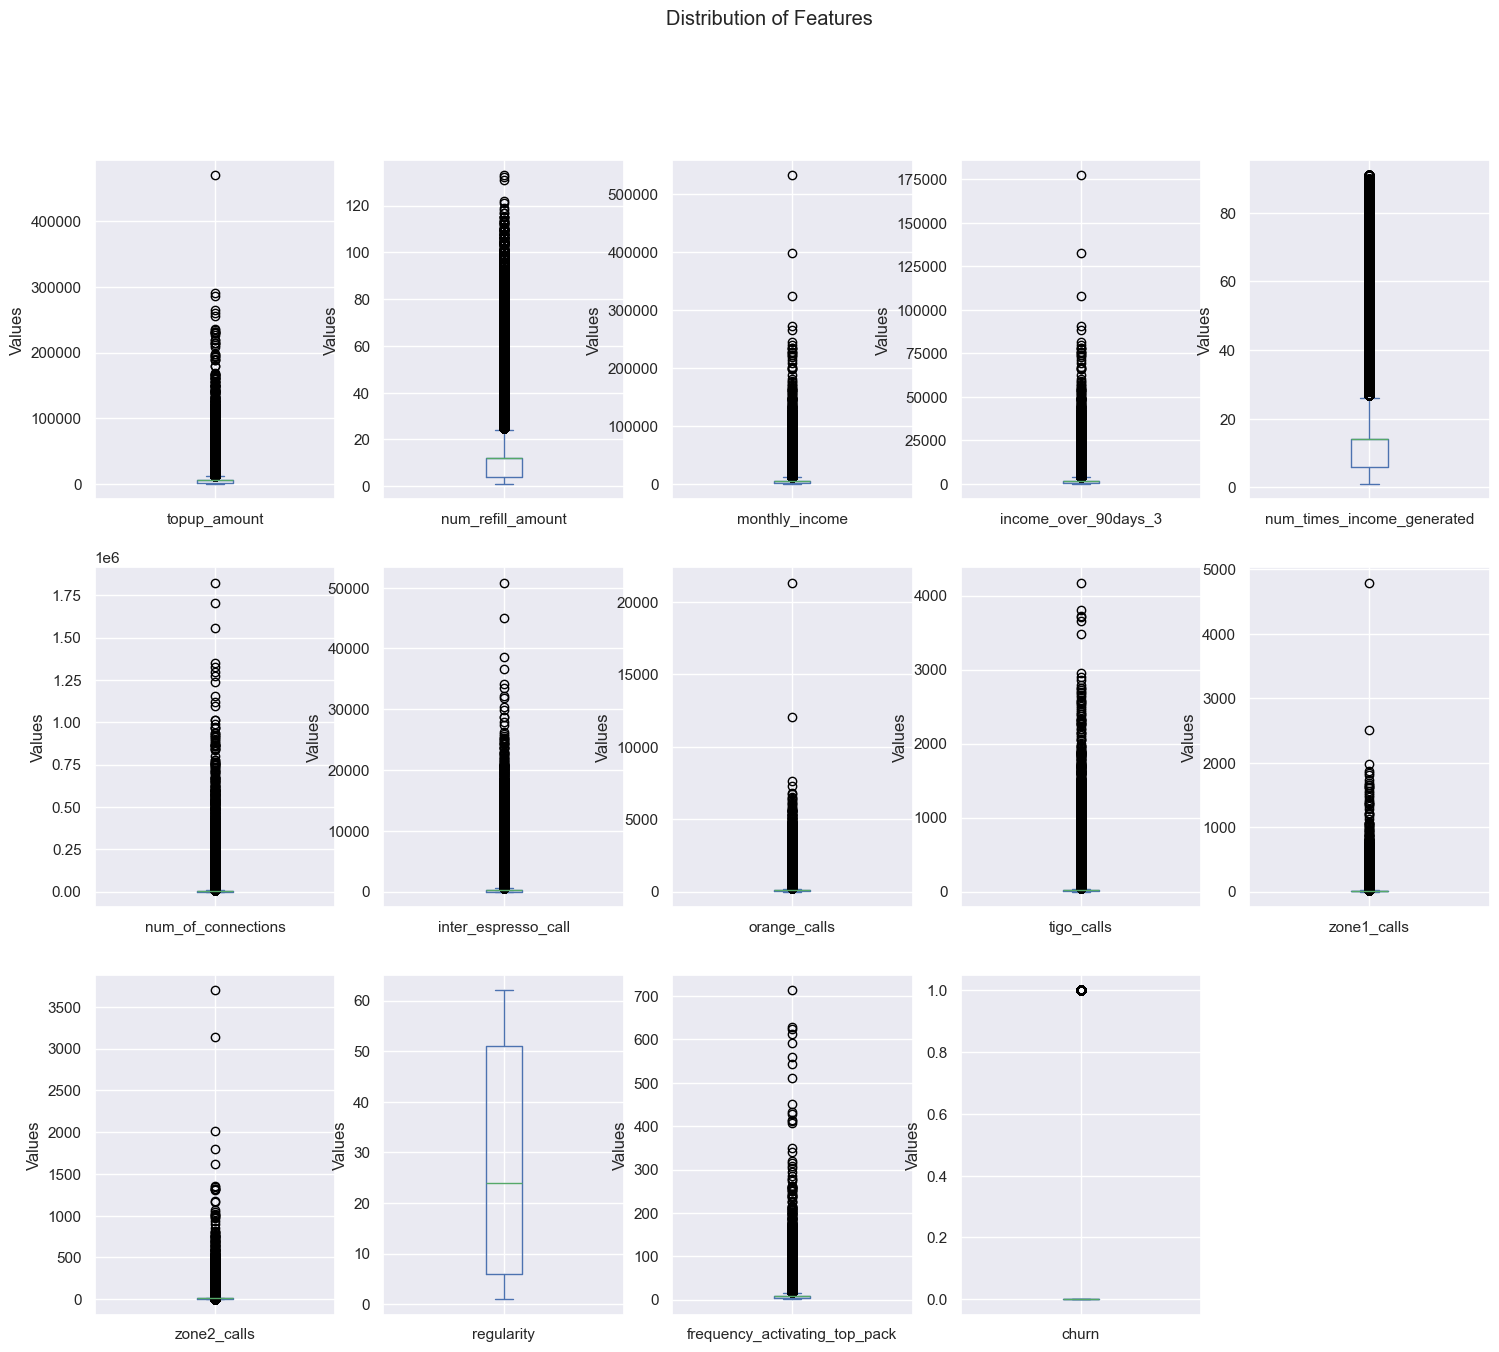

In [106]:
# Create a boxplot to see the distribution of data basing on the upper and lower percentiles
df.plot(kind ='box', subplots=True, figsize=(18,15), layout =(3,5), ylabel='Values', title='Distribution of Features')
plt.show()

#### Using IQR to remove outliers in our dataset

In [116]:
outlier_cols = df.drop(df.select_dtypes(include=['object']).columns.tolist(), axis=1)
outlier_cols.drop('churn', axis=1, inplace=True) #Let's drop churn since it will be our target column
outlier_cols.columns.tolist()

['topup_amount',
 'num_refill_amount',
 'monthly_income',
 'income_over_90days_3',
 'num_times_income_generated',
 'num_of_connections',
 'inter_espresso_call',
 'orange_calls',
 'tigo_calls',
 'zone1_calls',
 'zone2_calls',
 'regularity',
 'frequency_activating_top_pack']

In [114]:
def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    inter_quartile_range = Q3 - Q1
    upper_limit = Q3 + (1.5*inter_quartile_range)
    lower_limit = Q1 - (1.5*inter_quartile_range)
    return upper_limit, lower_limit

In [117]:
new_df = df.copy()

In [118]:
for col in outlier_cols:
    UL, LL = outlier_limits(new_df[col])
    new_df.loc[(new_df[col] > UL), col] = UL
    new_df.loc[(new_df[col] < LL), col] = LL

/var/folders/mk/pdjmq76j5h1b0nv4v9ys81cr0000gn/T/ipykernel_51404/1024057275.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '118.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df[col] > UL), col] = UL


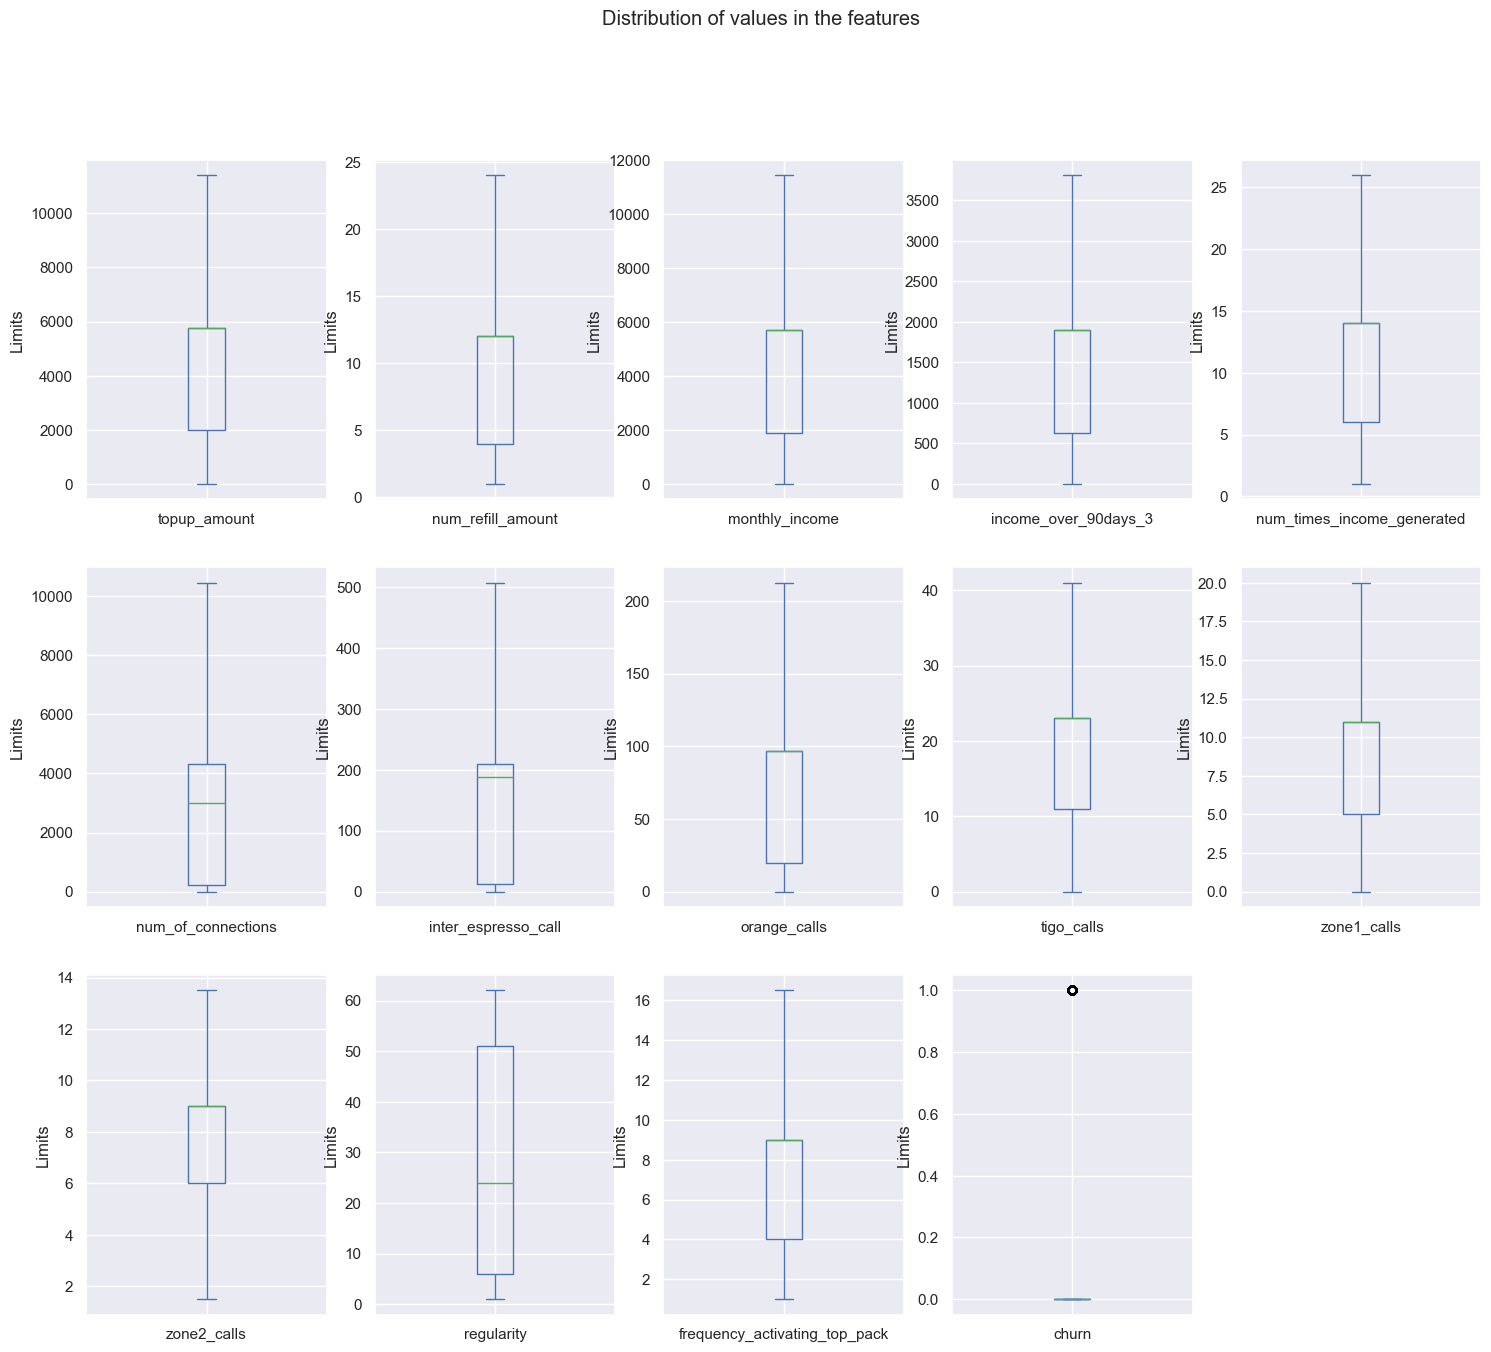

In [119]:
# Create a boxplot to see the distribution of data basing on the upper and lower percentiles
new_df.plot(kind ='box', subplots=True, figsize=(18,15), layout =(3,5), ylabel='Limits', title='Distribution of values in the features')
plt.show()

#### Encoding our data

In [120]:
le = LabelEncoder()

In [121]:
for col in new_df.columns:
    if new_df[col].dtype == 'object':
        new_df[col] = le.fit_transform(new_df[col])

In [131]:
new_df.visiting_client.unique()

array([0])

In [130]:
new_df.sample(10)

,region,network_duration,topup_amount,num_refill_amount,monthly_income,income_over_90days_3,num_times_income_generated,num_of_connections,inter_espresso_call,orange_calls,tigo_calls,zone1_calls,zone2_calls,visiting_client,regularity,active_pack,frequency_activating_top_pack,churn
1075685,4,7,5600.0,23.0,5532.0,1844.0,26.0,1665.0,1.0,18.0,0.0,5.0,5.0,0,56.0,31,16.5,0
1311206,0,7,5761.0,12.0,5713.0,1904.0,14.0,4321.0,210.0,97.0,23.0,11.0,9.0,0,5.0,18,9.0,0
1860001,11,7,200.0,1.0,200.0,67.0,1.0,5.0,11.0,2.0,12.0,7.0,4.0,0,45.0,18,10.0,0
1231918,0,7,5761.0,12.0,5713.0,1904.0,14.0,4321.0,210.0,97.0,23.0,11.0,9.0,0,1.0,18,9.0,0
624274,0,7,100.0,1.0,400.0,133.0,5.0,4321.0,8.0,1.0,23.0,0.0,9.0,0,30.0,126,3.0,0
1074704,6,7,5600.0,24.0,5562.0,1854.0,26.0,708.0,507.0,76.0,11.0,4.0,4.0,0,62.0,107,16.5,0
2108799,0,7,5761.0,12.0,5713.0,1904.0,14.0,4321.0,210.0,97.0,23.0,11.0,9.0,0,52.0,18,9.0,0
886656,9,7,11100.0,23.0,9448.0,3149.0,22.0,2253.0,507.0,107.0,4.0,3.0,4.0,0,46.0,113,10.0,0
1644391,12,7,3250.0,7.0,3250.0,1083.0,11.0,758.0,31.0,4.0,10.0,1.0,6.0,0,44.0,44,3.0,0
467145,2,7,1500.0,3.0,1500.0,500.0,3.0,1144.0,11.0,16.0,8.0,4.0,4.0,0,22.0,18,3.0,0


#### Feature Selection

In [126]:
new_df.drop(['user_id'], axis=1, inplace=True)

#### Generate our Correlation Matrix

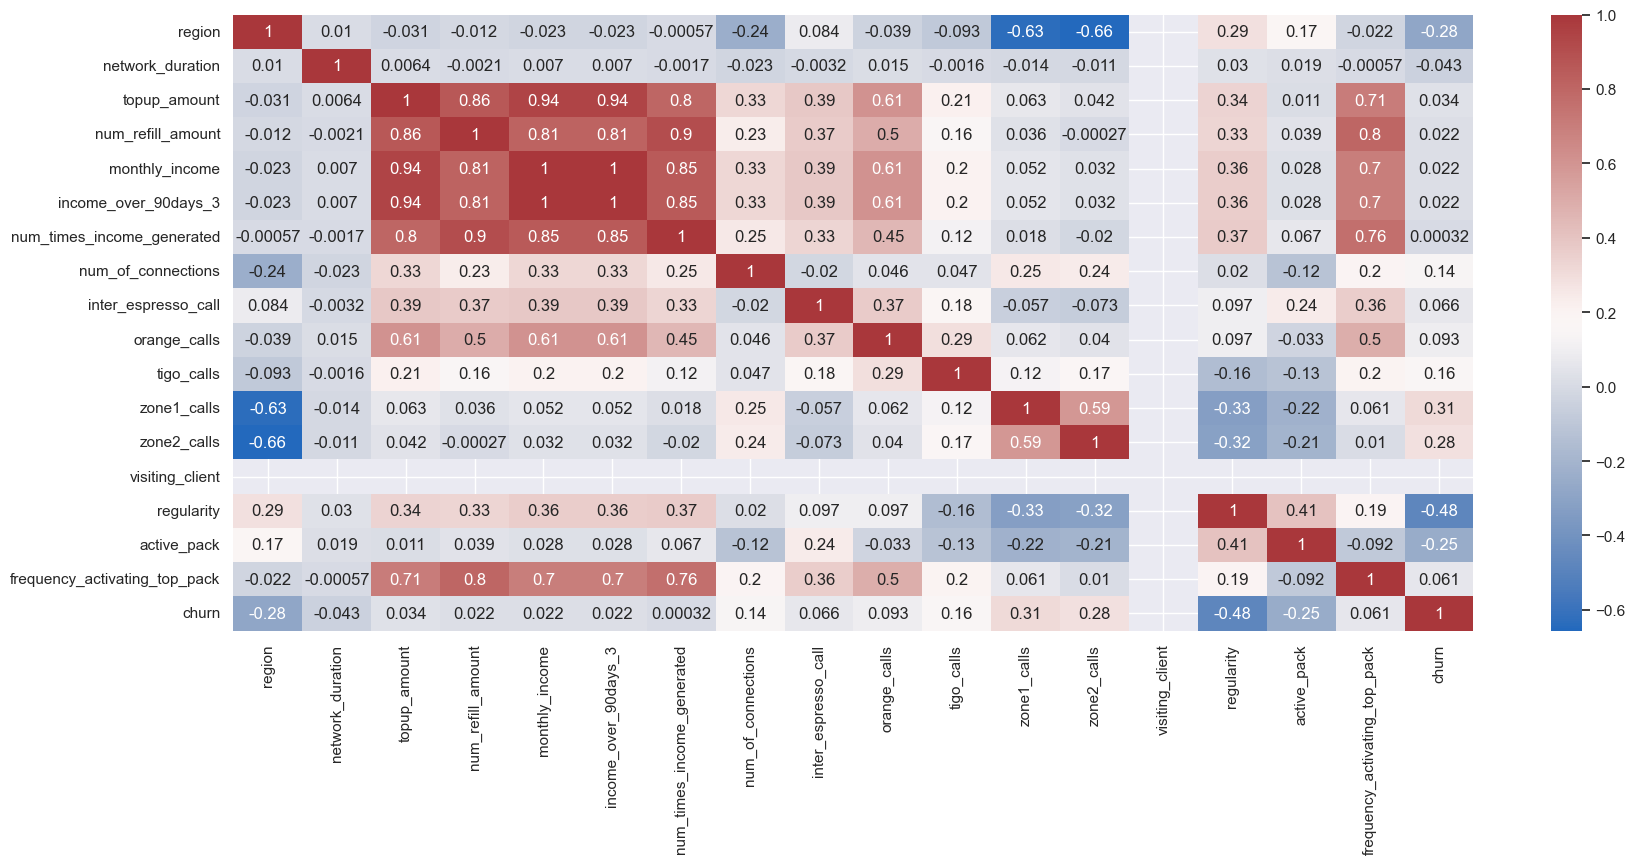

In [129]:
plt.figure(figsize=(20,8))
sns.heatmap(data=new_df.corr(), annot=True, cmap='vlag')
plt.show()

In [133]:
new_df.visiting_client.nunique(), new_df.visiting_client.unique()

(1, array([0]))

Let's drop the visiting_client feature since it contains only 1 unique value

In [134]:
new_df.drop(['visiting_client'], axis=1, inplace=True)

Looking at the correlation, the positive correlations basing on churn include zone_calls have a high correlation above 0.25 to the churn while the region, regularity and active_pack have a weak correlation on the churn rate.

We can use them to train our model and adjust later based on the performance of our model

### Train our model

#### Choosing our features

In [136]:
X = new_df[['region', 'num_of_connections', 'zone1_calls', 'zone2_calls', 'regularity', 'active_pack']]
y = new_df['churn']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Choosing & Training our model

Since we want to predict the churn rate of the espresso clients i.e. whether a customer will reorder or not, it is a binary classification problem. We can use a Logisitics Classifier to train our model

In [142]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [143]:
y_pred = model.predict(X_test)

#### Evaluating our model performance

In [144]:
# Checking actual vs prediction values
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
pred_df.head(15)

,Actual,Predicted
566939,0,0
620796,0,0
299703,1,1
1051494,0,0
527353,0,0
187702,0,0
54464,0,0
509976,0,0
1607660,0,0
229183,1,0


In [145]:
accuracy = model.score(X_test, y_test)
print("Accuracy={:.2f}".format(accuracy))

Accuracy=0.86


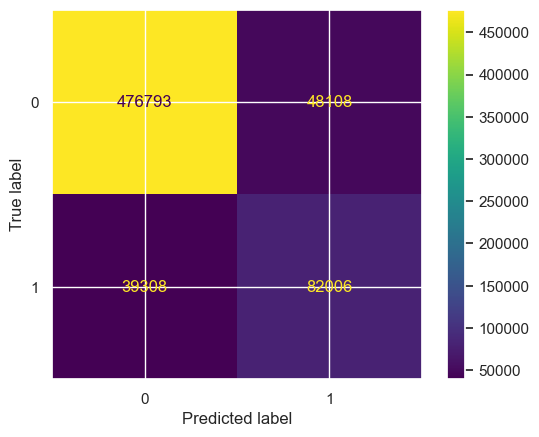

In [147]:
# Confusion matrix
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cmx, display_labels = [0, 1]).plot()

* True Negative (Top-Left Quadrant) (476793)

* False Positive (Top-Right Quadrant) (48108)

* False Negative (Bottom-Left Quadrant) (39308)

* True Positive (Bottom-Right Quadrant) (82006)

* True means that the values were accurately predicted, False means that there was an error or wrong prediction.

Our model correctly predicts instances where the churn rate marked as "0" 476793 times with only 48108 predicted instance going against the actual. It also correctly predicts the churn rate marked as "1" 82006 times with only 39308 instances identifying them as correct when they were wrong

In [148]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92    524901
           1       0.63      0.68      0.65    121314

    accuracy                           0.86    646215
   macro avg       0.78      0.79      0.78    646215
weighted avg       0.87      0.86      0.87    646215



- Precision - ratio of true positivies to the total number of predicted positives and measures the accuracy of the positive predictions made by the mode
- Recall - the ratio of true positives to the total number of actual positives. It measures the ability of the model to correctly identify positive samples.
- F1 score - the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

Our model has an f1-score of 0.92 which means it's performing extremely well and predicts whether a customer will reorder (churn rate) 92% of the times